In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [2]:
digits = load_digits()

X = digits.data      # features
y = digits.target    # labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


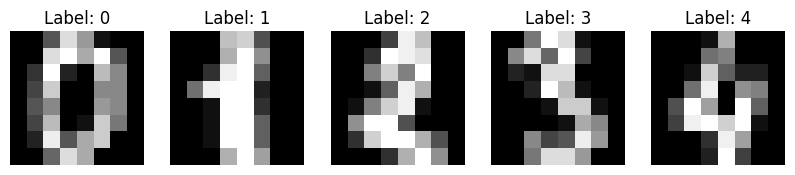

In [4]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)



Training samples: (1437, 64)
Testing samples: (360, 64)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9694444444444444


In [10]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

for k, acc in zip(k_values, accuracies):
    print(f"K = {k}, Accuracy = {acc}")



K = 3, Accuracy = 0.9694444444444444
K = 5, Accuracy = 0.975
K = 7, Accuracy = 0.9722222222222222
K = 9, Accuracy = 0.9722222222222222


In [12]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

for k, acc in zip(k_values, accuracies):
    print(f"K = {k}, Accuracy = {acc}")


K = 3, Accuracy = 0.9694444444444444
K = 5, Accuracy = 0.975
K = 7, Accuracy = 0.9722222222222222
K = 9, Accuracy = 0.9722222222222222


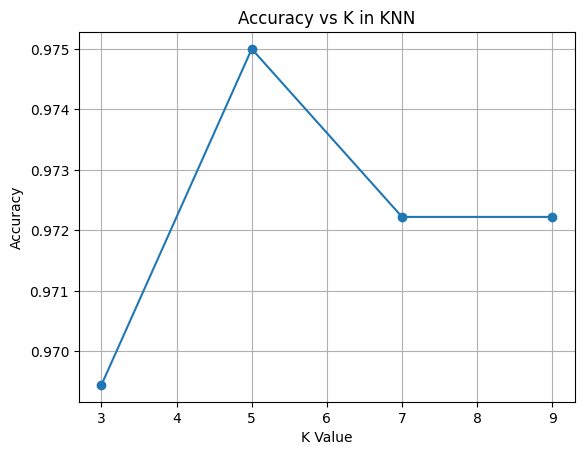

In [13]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid(True)
plt.show()


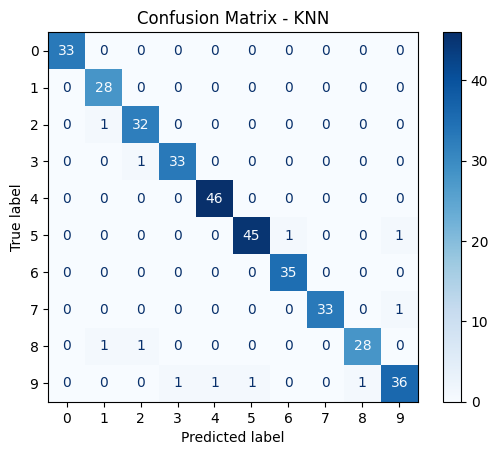

In [15]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


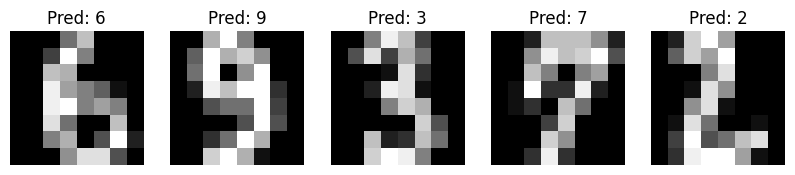

In [19]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.show()


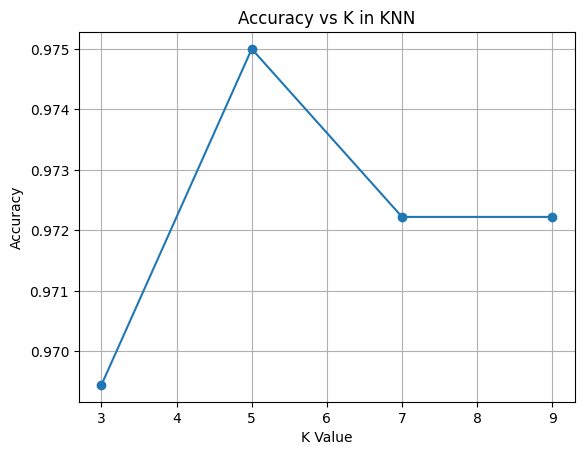

In [23]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid(True)

# Save the plot
plt.savefig("accuracy_vs_k.png", dpi=300, bbox_inches='tight')

plt.show()


In [24]:
from google.colab import files
files.download("accuracy_vs_k.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>